In [10]:
import pandas as pd
import seaborn as sns
train = pd.read_csv(r"train.csv")

In [11]:
test = pd.read_csv(r"test.csv")

In [12]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
#combining train and test
dataset =  pd.concat(objs=[train, test], axis=0,ignore_index=True)
dataset["Fare"].fillna(dataset["Fare"].median(),inplace=True)
#dataset.Fare.isnull().sum()

In [ ]:
### Check skewness of Fares 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


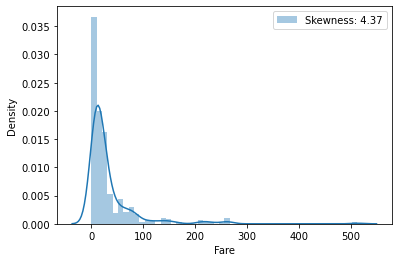

In [15]:
t=sns.distplot(dataset["Fare"],label="Skewness: %.2f"%(dataset["Fare"].skew()) )
t.legend()

#### So as we can see Fare distribution is very skewed. Such data can be handled by following ways:

1. Log Transform
2. Box Cox Transform
3. Square Root Transform

##### Log Transform
* This is most commonly used
* Easily done by np.log()
* Data should not have null values
* Handle values at 0 (np.log(0) encounters divide by zero)
* Lets apply it on our dataset and plot it.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


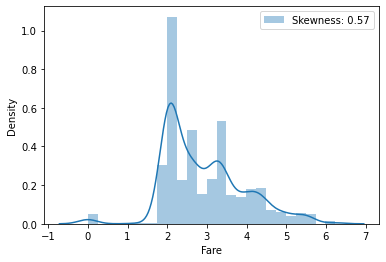

In [16]:
import numpy as np
Log_Fare = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()

##### Skewness is reduced from 4.37 to 0.57

##### Box Cox Transform
* Data must be positive
* Imported from scipy (expand the code below to see)
* Since data we have in "Fare" is not postive so we cannot apply this functions. However, to have a jist of how function is * applied lets convert fare values to postive. (Note: This is not to be done when solving a real problem, doing this just so that we can see how function is applied)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


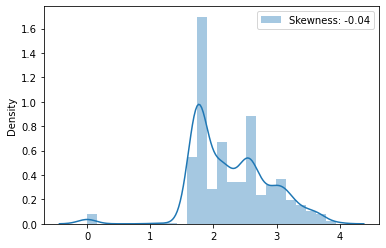

In [17]:
from scipy import stats
Boxcox_Fare = dataset["Fare"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_Fare= stats.boxcox(Boxcox_Fare)
Boxcox_Fare= pd.Series(Boxcox_Fare[0])
t=sns.distplot(Boxcox_Fare,label="Skewness: %.2f"%(Boxcox_Fare.skew()) )
t.legend()

* We will not compare the skewness as we have heavily manipulated data but in general when dealing with positive data it will reduce to great extent

#### Square Root Transform
* Not generally used as taking square root shortens the range of variables
* Can be applied via np.sqrt()
- Lets try it on "Fare" column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


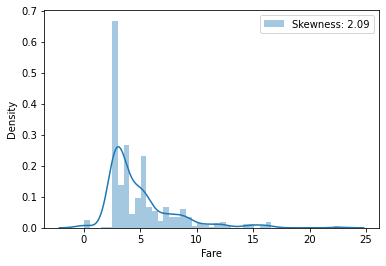

In [20]:
Sqrt_Fare = dataset["Fare"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_Fare,label="Skewness: %.2f"%(Sqrt_Fare.skew()) )
t.legend()

* Not too much reduction in skewness but still the change is noticable as skewness decreased from 4.37 to 2.09



### Conclusion
* Models such as ones baseed on linear regression makes reliable predictions if the fetaures are normally distributed. However we, must remember on which feature we perfromed the transform as we have to reverse it before making predictions